# Smoking Prediction Dataset
Este notebook contiene una exploración inicial del conjunto de datos relacionado con predicción del hábito de fumar.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para visualizaciones
sns.set(style='whitegrid')

## Carga del archivo CSV

In [22]:
df = pd.read_csv('7_smoking_prediction.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Información general del conjunto de datos

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Coderhouse_DataScience/Colab_Notebooks')

Mounted at /content/drive


In [ ]:
df.info()

## Variables y tipos de datos

In [12]:
data = pd.read_csv("7_smoking_prediction.csv")

cantidad_m = data['gender'].value_counts().get('M', 0)
cantidad_f = data['gender'].value_counts().get('F', 0)

print(f"Cantidad de M: {cantidad_m}")
print(f"Cantidad de F: {cantidad_f}")

Cantidad de M: 35401
Cantidad de F: 20291


In [13]:
data = pd.read_csv("7_smoking_prediction.csv")

edades = data['age']

cantidad_personas = edades.count()
edad_promedio = edades.mean()
edad_maxima = edades.max()
edad_minima = edades.min()

print(f"Cantidad de personas: {cantidad_personas}")
print(f"Edad promedio: {edad_promedio:.2f}")
print(f"Edad máxima: {edad_maxima}")
print(f"Edad mínima: {edad_minima}")

Cantidad de personas: 55692
Edad promedio: 44.18
Edad máxima: 85
Edad mínima: 20


In [14]:
data = pd.read_csv("7_smoking_prediction.csv")

Cholesterol = data['Cholesterol']

cantidad_registros = Cholesterol.count()
Cholesterol_promedio = Cholesterol.mean()
Cholesterol_maximo = Cholesterol.max()
Cholesterol_minimo = Cholesterol.min()

print(f"Cantidad de registros: {cantidad_registros}")
print(f"Colesterol promedio: {Cholesterol_promedio:.2f}")
print(f"Colesterol máximo: {Cholesterol_maximo}")
print(f"Colesterol mínimo: {Cholesterol_minimo}")

Cantidad de registros: 55692
Colesterol promedio: 196.90
Colesterol máximo: 445.0
Colesterol mínimo: 55.0


In [15]:
valores_nulos = data.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


#####Hipotesis numero 1, relación entre edad y colesterol, coloreado por genero ¿Se puede relacionar la edad o el genero con el nivel de colesterol?
- En edades mas jovenes, menores a 40 años, se ve mas hombres en el rango de 100 a 300 de colesterol.


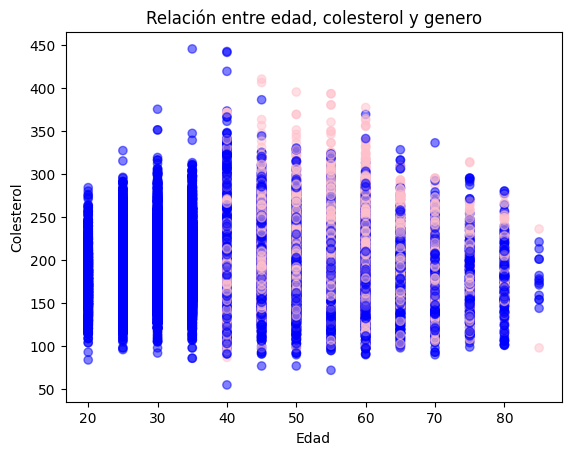

In [16]:
# Gráfico de dispersión (Edad vs Colesterol, coloreado por genero)
colores = {'M': 'blue', 'F': 'pink'}
plt.scatter(data['age'], data['Cholesterol'], c=data['gender'].map(colores), alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.title('Relación entre edad, colesterol y genero')
plt.show()

Hipotesis número 2, relación entre edad y peso coloreado por genero, ¿Se puede observar una relación entre la edad, el peso y el genero de los fumadores?
- Los menores de 40 años son mayoritariamente hombres y se encuentran entre 40 y 140 kg
- Luego los mayores de 40 años se puede observar que son mayoritariamente mujeres y entre 20 y 60 kg

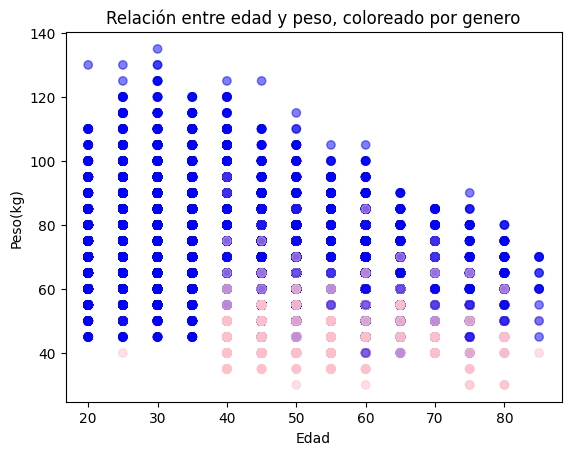

In [18]:
# Gráfico de dispersión (Edad vs peso, coloreado por genero)
colores = {'M': 'blue', 'F': 'pink'}
plt.scatter(data['age'], data['weight(kg)'], c=data['gender'].map(colores), alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Peso(kg)')
plt.title('Relación entre edad y peso, coloreado por genero')
plt.show()

## Estadísticas descriptivas

In [19]:
df = pd.read_csv('7_smoking_prediction.csv')
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


## Distribución de la variable objetivo (`smoking`)

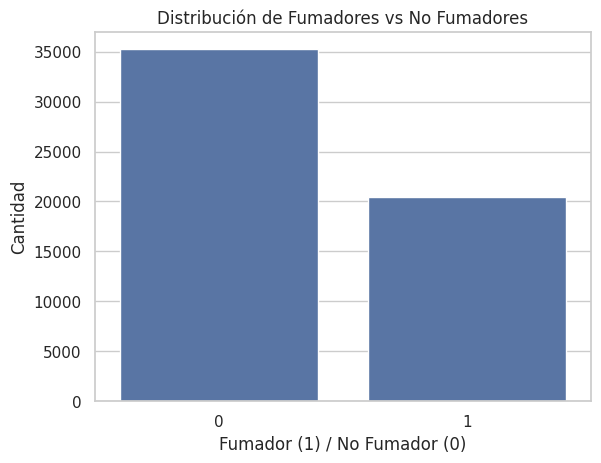

In [23]:
sns.countplot(data=df, x='smoking')
plt.title('Distribución de Fumadores vs No Fumadores')
plt.xlabel('Fumador (1) / No Fumador (0)')
plt.ylabel('Cantidad')
plt.show()

## Mapa de calor de correlaciones entre variables numéricas

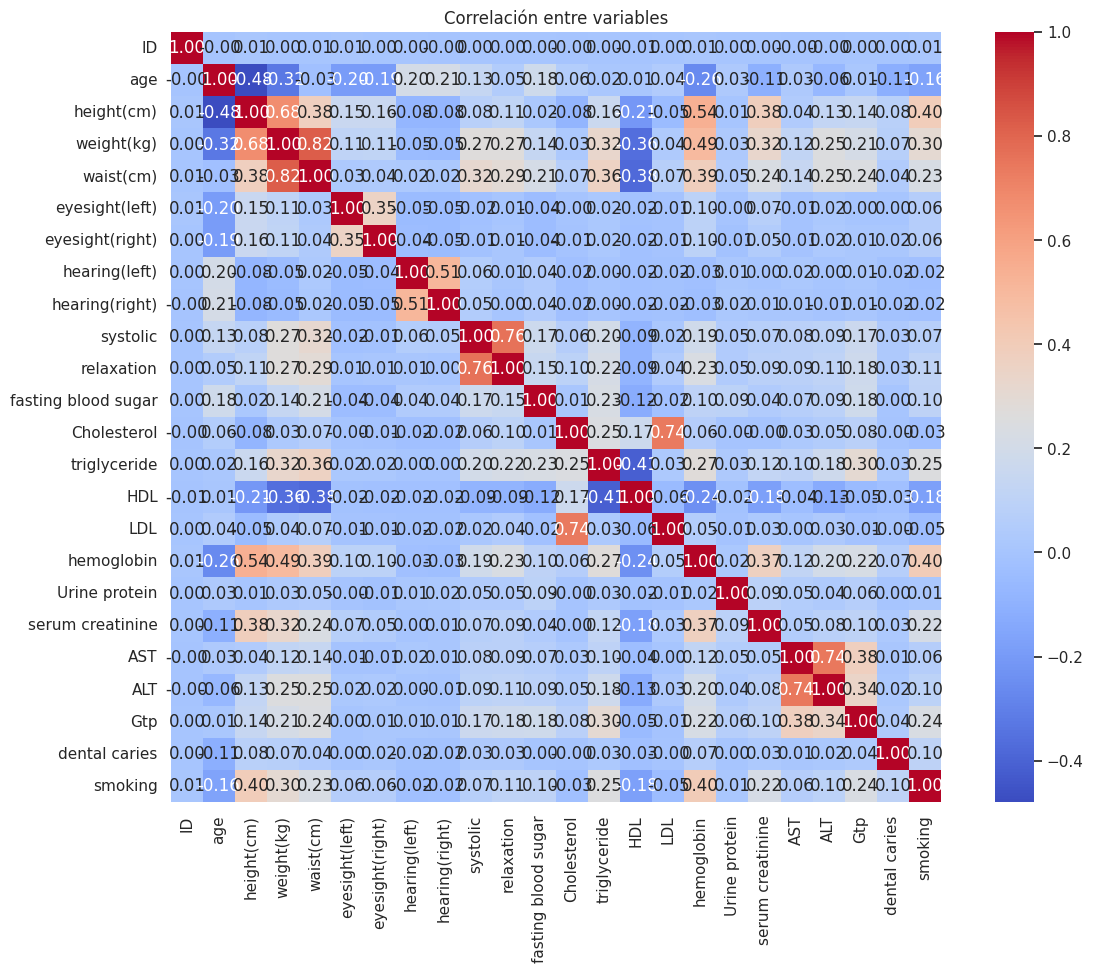

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlación entre variables")
plt.show()

## Comparación de variables según el hábito de fumar

Este codigo esta hecho con IA, (queria probar que podiamos hacer juntos)

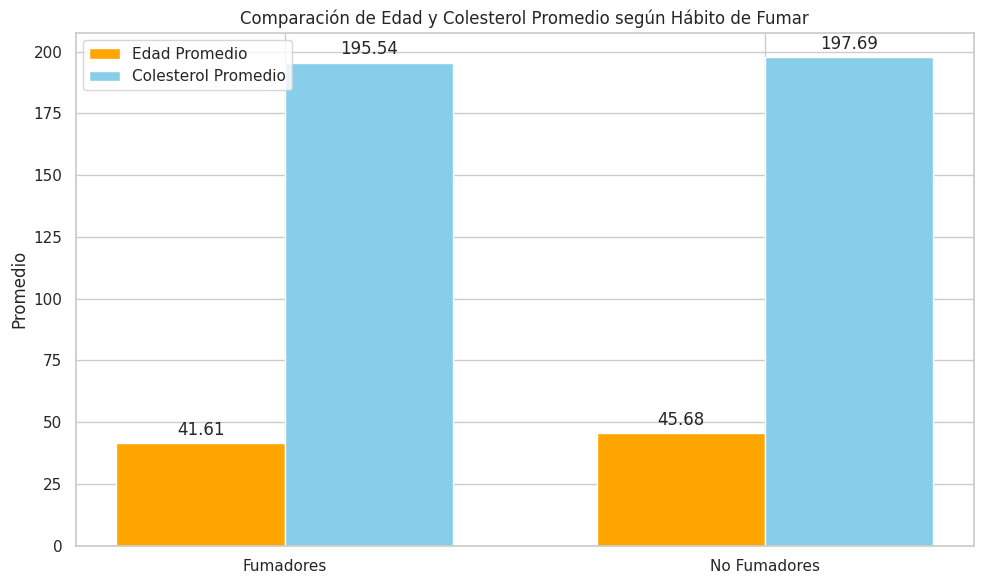

In [31]:
import numpy as np

fumadores = data[data['smoking'] == 1]
no_fumadores = data[data['smoking'] == 0]

edad_promedio_fumadores = fumadores['age'].mean()
edad_promedio_no_fumadores = no_fumadores['age'].mean()

colesterol_promedio_fumadores = fumadores['Cholesterol'].mean()
colesterol_promedio_no_fumadores = no_fumadores['Cholesterol'].mean()

grupos = ['Fumadores', 'No Fumadores']
edades_promedio = [edad_promedio_fumadores, edad_promedio_no_fumadores]
colesterol_promedio = [colesterol_promedio_fumadores, colesterol_promedio_no_fumadores]

ancho_barra = 0.35

posicion_fumadores = np.arange(len(grupos))
posicion_no_fumadores = [pos + ancho_barra for pos in posicion_fumadores]

fig, ax = plt.subplots(figsize=(10, 6))

barras_edad = ax.bar(posicion_fumadores, edades_promedio, ancho_barra, label='Edad Promedio', color='orange')

barras_colesterol = ax.bar(posicion_no_fumadores, colesterol_promedio, ancho_barra, label='Colesterol Promedio', color='skyblue')

ax.set_xticks([pos + ancho_barra / 2 for pos in posicion_fumadores])
ax.set_xticklabels(grupos)

ax.set_ylabel('Promedio')
ax.set_title('Comparación de Edad y Colesterol Promedio según Hábito de Fumar')
ax.legend()

def autolabel(rects):
    """Adjunta una etiqueta con su valor en la parte superior de cada barra."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(barras_edad)
autolabel(barras_colesterol)

plt.tight_layout()
plt.show()